In [45]:
from ibapi.client import EClient 
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
import numpy as np
import time 
import threading 

# listOfTickers = ["AACG","AACIU","AACOU","AADI","AADR","AAL","AAME","AAOI","AAON","AAPL",
#                  "AATC","AAWW","AAXJ","ABCB","ABCL","ABCM","ABEO","ABGI","ABIO","ABMD",
#                  "ABNB","ABOS","ABSI","ABST","ABTX","ABUS","ABVC","ACAD","ACAH","ACAHU",
#                  "ACB","ACBA","ACBAU","ACBI","ACCD","ACER","ACET","ACEV","ACEVU","ACGL",
#                  "ACGLN","ACGLO","ACGLP","ACHC","ACHL","ACHV","ACIU","ACIW","ACKIT","ACKIU",
#                  "ACLS","ACMR","ACNB","ACOR","ACQR","ACQRU","ACRS","ACRX","ACST","ACT",
#                  "ACTD","ACTDU","ACTG","ACVA","ACWI","ACWX","ACXP","ADAG","ADAP","ADBE",
#                  "ADER","ADERU","ADES","ADGI","ADI","ADIL","ADMA","ADMP","ADMS","ADN","ADOC",
#                  "ADOCR","ADP","ADPT","ADRE","ADSK","ADTN","ADTX","ADUS","ADV","ADVM","ADXN",
#                  "ADXS","AEAC","AEACU","AEHAU","AEHL","AEHR","AEI","AEIS"]

# listOfTickers = ["AAPL", "MSFT", "AMZN", "FB", "TSLA", "NVDA", "PYPL" ,"ADBE",
#                  "CMCSA", "NFLX", "CSCO", "COKE", "INTC", "PEP", "COST", "AVGO"]

listOfTickers = ["AAPL", "MSFT", "AMZN", "FB", "TSLA"]

class App(EClient, EWrapper):
    def __init__(self):
        EClient.__init__(self,self)
        self.data = {}
        
    def error(self, reqId, errorCode, errorString):
        print("reqId: {}, errorCode: {}, errorString {}".format(reqId, errorCode, errorString))
        
    def contractDetails(self, reqId, contractDetails):
        print("reqId: {}, contract: {}".format(reqId, contractDetails))
        
    def historicalData(self, reqId, bar):
        if reqId not in self.data:
#             self.data[reqId] = [{"date": bar.date, "open": bar.open, "high": bar.high, "low": bar.low, "close": bar.close, "volume": bar.volume}]
            self.data[reqId] = [{"close": bar.close}]
            print(bar.close)
        else:
#             self.data[reqId].append({"date": bar.date, "open": bar.open, "high": bar.high, "low": bar.low, "close": bar.close, "volume": bar.volume})
            self.data[reqId].append({"close": bar.close})
        
def ts_delay(var, lookback):
    rolled = np.roll(var, lookback)
    zero_ver = np.zeros(len(var))
    index_array = np.arange(len(var))
    final_array = np.where(index_array < lookback, np.nan, rolled)
    return final_array

def makeNasdaqContract(symbol, secType = "STK", exchange = "SMART", primaryExchange = "NASDAQ", currency = "USD"):
    contract = Contract()
    contract.symbol = symbol
    contract.secType = secType
    contract.exchange = exchange
    contract.primaryExchange = primaryExchange
    contract.currency = currency
    return contract

def getHistData(reqId, 
                contract, 
                durationStr,
                barSizeSetting, 
                whatToShow, 
                endDateTime = "", 
                useRTH = 1, 
                formatDate = 1, 
                keepUpToDate = 0,
                chartOptions = []):
    
    app.reqHistoricalData(reqId = reqId,
                          contract = contract,
                          endDateTime = endDateTime,
                          durationStr = durationStr,
                          barSizeSetting = barSizeSetting,
                          whatToShow = whatToShow,
                          useRTH = useRTH,
                          formatDate = formatDate,
                          keepUpToDate = keepUpToDate,
                          chartOptions = chartOptions)
    
def getHistDataMultiple(lst, time = "1 M", granularity = "5 mins", infoType = "MIDPOINT"):
    for i in range(len(lst)):
        ticker = lst[i]
        getHistData(i, makeNasdaqContract(ticker), time, granularity, infoType)
    return 0;


    
def socketConnection():
    app.run()
            
app = App()

app.connect("127.0.0.1", 7497, 1)

#START CONNECTION
socketThread = threading.Thread(target = socketConnection, daemon = True)
socketThread.start()
time.sleep(1)

# getHistData(89, makeNasdaqContract("AACG"), "1 M", "1 min", "MIDPOINT")

getHistDataMultiple(listOfTickers, "1 M", "1 min", "MIDPOINT")

time.sleep(150)
#END CONNECTION
app.disconnect()

reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:hfarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:usfarm.nj
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:jfarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:eufarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:usfuture
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:cashfarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:cafarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:usfarm
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:euhmds
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:ushmds.nj
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:fundfarm
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:ushmds
reqId: -1, errorCode: 2158

In [43]:
app.disconnect()

In [46]:
app.data

{4: [{'close': 683.235},
  {'close': 685.225},
  {'close': 683.255},
  {'close': 681.355},
  {'close': 682.015},
  {'close': 685.18},
  {'close': 682.025},
  {'close': 680.245},
  {'close': 679.735},
  {'close': 679.41},
  {'close': 677.425},
  {'close': 676.345},
  {'close': 675.695},
  {'close': 676.33},
  {'close': 676.875},
  {'close': 676.9},
  {'close': 678.75},
  {'close': 679.135},
  {'close': 678.41},
  {'close': 676.75},
  {'close': 677.57},
  {'close': 676.51},
  {'close': 675.32},
  {'close': 675.7},
  {'close': 676.64},
  {'close': 675.785},
  {'close': 673.96},
  {'close': 674.23},
  {'close': 673.725},
  {'close': 673.37},
  {'close': 675.875},
  {'close': 677.28},
  {'close': 677.2},
  {'close': 677.96},
  {'close': 677.74},
  {'close': 676.87},
  {'close': 675.91},
  {'close': 676.79},
  {'close': 679.01},
  {'close': 678.7},
  {'close': 679.365},
  {'close': 679.98},
  {'close': 680.655},
  {'close': 679.855},
  {'close': 679.81},
  {'close': 679.44},
  {'close': 679.

In [5]:
from ibapi.client import EClient 
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
import numpy as np
import time 
import threading 

class App(EClient, EWrapper):
    def __init__(self):
        EClient.__init__(self,self)
        self.data = {}
        
    def error(self, reqId, errorCode, errorString):
        print("reqId: {}, errorCode: {}, errorString {}".format(reqId, errorCode, errorString))
        
    def contractDetails(self, reqId, contractDetails):
        print("reqId: {}, contract: {}".format(reqId, contractDetails))
        
    def historicalData(self, reqId, bar):
        if reqId not in self.data:
            self.data[reqId] = [{"date": bar.date, "open": bar.open, "high": bar.high, "low": bar.low, "close": bar.close, "volume": bar.volume}]
        else:
            self.data[reqId].append({"date": bar.date, "open": bar.open, "high": bar.high, "low": bar.low, "close": bar.close, "volume": bar.volume})

    
def socketConnection():
    app.run()
            
app = App()

app.connect("127.0.0.1", 7497, 1)

#START CONNECTION
socketThread = threading.Thread(target = socketConnection, daemon = True)
socketThread.start()
time.sleep(1)

#END CONNECTION
app.disconnect()

reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:hfarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:usfarm.nj
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:jfarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:eufarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:usfuture
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:cashfarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:cafarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:usfarm
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:euhmds
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:ushmds.nj
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:fundfarm
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:ushmds
reqId: -1, errorCode: 2158

In [12]:
import pandas as pd
pd.DataFrame.from_dict(app.data[0])


def convertToDataframe(tradeObject, tickers):
    df_dict = {}
    for ticker in tickers:
        df_dict[ticker] = pd.DataFrame(tradeObject)

SyntaxError: unexpected EOF while parsing (<ipython-input-12-ddbba168a95d>, line 8)

In [16]:
app.data

{4: [{'close': 679.88},
  {'close': 673.395},
  {'close': 674.885},
  {'close': 680.095},
  {'close': 709.015},
  {'close': 706.24},
  {'close': 707.93},
  {'close': 708.4},
  {'close': 709.86},
  {'close': 711.055},
  {'close': 705.08},
  {'close': 701.155},
  {'close': 711.28},
  {'close': 711.775},
  {'close': 728.71},
  {'close': 730.87},
  {'close': 737.87},
  {'close': 735.555},
  {'close': 736.9},
  {'close': 734.02},
  {'close': 739.23},
  {'close': 732.28},
  {'close': 726.05},
  {'close': 733.68},
  {'close': 750.695},
  {'close': 752.825},
  {'close': 742.85},
  {'close': 753.93},
  {'close': 755.36},
  {'close': 754.675},
  {'close': 754.17},
  {'close': 736.19},
  {'close': 721.585},
  {'close': 743.06},
  {'close': 747.82},
  {'close': 744.665},
  {'close': 746.115},
  {'close': 755.88},
  {'close': 750.955},
  {'close': 756.785},
  {'close': 751.815},
  {'close': 759.94}]}

In [48]:
import pandas as pd
pd.DataFrame.from_dict(app.data[0])


def convertToDataFrame(tradeObject, tickers):
    df_dict = {}
    for ticker in tickers:
        df_dict[ticker] = pd.DataFrame(tradeObject.data[tickers.index(ticker)])
#         df_dict[ticker].set_index("date", inplace = True)
    return df_dict

data_vers = convertToDataFrame(app, listOfTickers)



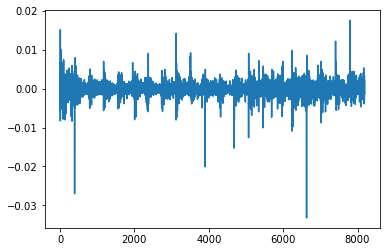

In [80]:
import matplotlib.pyplot as plt
numpy_verAAPL = pd.DataFrame.to_numpy(data_vers["AAPL"]).reshape(1,8190)
numpy_verMSFT = pd.DataFrame.to_numpy(data_vers["MSFT"]).reshape(1,8190)
numpy_verAMZN = pd.DataFrame.to_numpy(data_vers["AMZN"]).reshape(1,8190)
numpy_verFB = pd.DataFrame.to_numpy(data_vers["FB"]).reshape(1,8190)
numpy_verTSLA = pd.DataFrame.to_numpy(data_vers["TSLA"]).reshape(1,8190)
top_five = np.vstack((numpy_verAAPL, numpy_verMSFT, numpy_verAMZN, numpy_verFB, numpy_verTSLA))


def ts_delay(var, days):
    if days > 0:
        rolled = np.roll(var, days)
        rolled[:, :days] = np.nan
        return rolled
    else:
        rolled = np.roll(var, days)
        rolled[:, days:] = np.nan
        return rolled
    
def rev(var, days):
    ret = (var - ts_delay(var, days))/(ts_delay(var, days))
    return -ret

future_returns = (ts_delay(top_five, -1) - top_five)/top_five

correct = (np.sign(rev(top_five, 1) * future_returns)) * abs(future_returns)

summed = np.sum(correct, axis = 0)
plt.plot(summed)
plt.show()

In [79]:
top_five

array([[ 145.63 ,  146.215,  146.025, ...,  146.095,  146.165,  146.015],
       [ 289.545,  290.175,  289.82 , ...,  300.19 ,  300.44 ,  299.815],
       [3211.585, 3210.895, 3206.35 , ..., 3461.9  , 3462.7  , 3461.74 ],
       [ 353.075,  353.08 ,  353.06 , ...,  364.795,  364.665,  364.61 ],
       [ 683.235,  685.225,  683.255, ...,  759.845,  759.895,  759.94 ]])

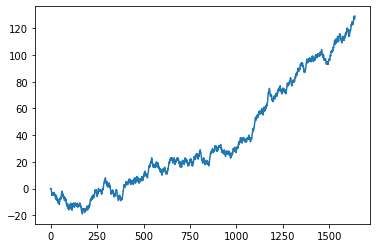

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

def convertToDataFrame(tradeObject, tickers):
    df_dict = {}
    for ticker in tickers:
        df_dict[ticker] = pd.DataFrame(tradeObject.data[tickers.index(ticker)])
        df_dict[ticker].set_index("date", inplace = True)
    return df_dict

data_vers = convertToDataFrame(app, listOfTickers)


aapl_close = pd.DataFrame.to_numpy(data_vers["AAPL"])[:,3]
aacg_close = pd.DataFrame.to_numpy(data_vers["AACG"])[:,3]
aaciu_close = pd.DataFrame.to_numpy(data_vers["AACIU"])[:,3]
# ret1 = (aapl_close - ts_delay(aapl_close, 1)) / ts_delay(aapl_close,1)

# future_returns = (ts_delay(aapl_close, - 1) - aapl_close) / aapl_close

# reversion = -ret1

# revenue_estimatepre = np.sign(future_returns * reversion)

# cleaned = np.nan_to_num(revenue_estimatepre)

# revenue_estimate = np.cumsum(cleaned)

# revenue_estimate

# plt.plot(revenue_estimate)
# plt.show

def revMaker(dataVar, retPeriod):
    ret = (dataVar - ts_delay(dataVar, retPeriod))/ts_delay(dataVar, retPeriod)
    future_returns = (ts_delay(dataVar, -1) - dataVar)/dataVar
    reversion = -ret
    revenue_estimatepre = np.sign(future_returns * reversion)
    cleaned = np.nan_to_num(revenue_estimatepre)
    revenue_estimate = np.cumsum(cleaned)
    return revenue_estimate



plt.plot(revMaker(aaciu_close, 2) + revMaker(aapl_close, 4))
plt.show()

In [ ]:
def ts_delay(var, lookback):
    rolled = np.roll(var, lookback)
    zero_ver = np.zeros(len(var))
    index_array = np.arange(len(var))
    final_array = np.where(index_array < lookback, np.nan, rolled)
    return final_array



In [31]:
data_vers["AAPL"]

,open,high,low,close,volume
date,,,,,
20210819 09:30:00,145.025,146.280,144.510,145.965,-1
20210819 09:35:00,145.965,146.270,145.035,145.060,-1
20210819 09:40:00,145.060,145.465,144.760,145.415,-1
20210819 09:45:00,145.415,145.895,145.055,145.345,-1
20210819 09:50:00,145.345,145.675,145.255,145.450,-1
...,...,...,...,...,...
20210917 15:35:00,146.055,146.115,145.935,145.985,-1
20210917 15:40:00,145.985,146.285,145.975,146.245,-1
20210917 15:45:00,146.245,146.265,145.925,145.995,-1


In [58]:
cleaned

array([ 0.,  1.,  1., ...,  1.,  1., -1.])

In [60]:
a = np.array([1, 2, 3, 4, 5])

In [61]:
a[0:3] = 4

In [62]:
a

array([4, 4, 4, 4, 5])